In [79]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [80]:
import warnings 
warnings.filterwarnings('ignore')

In [81]:
from sklearn.datasets import load_iris

In [82]:
data = load_iris()
x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['Target'])
print(data.target_names)

['setosa' 'versicolor' 'virginica']


In [83]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


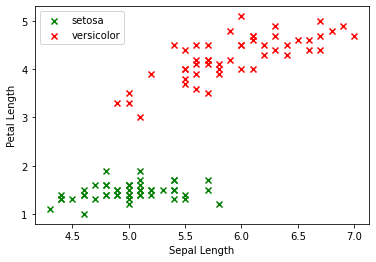

In [84]:
plt.scatter(x['sepal length (cm)'][:50], x['petal length (cm)'][:50], marker='x', color='green', label='setosa')
plt.scatter(x['sepal length (cm)'][50:100], x['petal length (cm)'][50:100], marker='x', color='red', label='versicolor')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

In [85]:
x = x.drop(['sepal width (cm)', 'petal width (cm)'], axis=1)
x = x[:100]
y = y[:100]

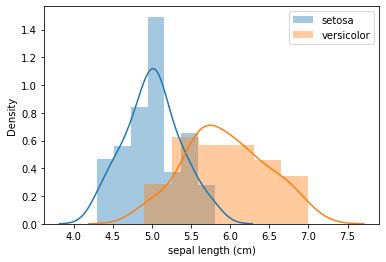

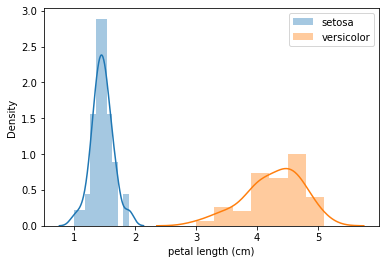

In [86]:
sns.distplot(x['sepal length (cm)'][:50], label='setosa')
sns.distplot(x['sepal length (cm)'][50:], label='versicolor')
plt.legend()
plt.show()

sns.distplot(x['petal length (cm)'][:50], label='setosa')
sns.distplot(x['petal length (cm)'][50:], label='versicolor')
plt.legend()
plt.show()

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123, test_size=0.2, shuffle=True)

In [89]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', gamma='auto')

In [90]:
svc.fit(x_train, y_train)

SVC(gamma='auto', kernel='linear')

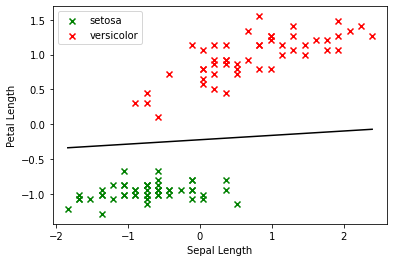

In [91]:
plt.scatter(x['sepal length (cm)'][:50], x['petal length (cm)'][:50], marker='x', color='green', label='setosa')
plt.scatter(x['sepal length (cm)'][50:], x['petal length (cm)'][50:], marker='x', color='red', label='versicolor')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

w = svc.coef_[0]
b = svc.intercept_[0]
x_points = np.linspace(min(x['sepal length (cm)']),max(x['sepal length (cm)']))
y_points = -(w[0]/w[1])*x_points - b/w[1]

plt.plot(x_points, y_points, color='black')
plt.show()

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, svc.predict(x_test))

1.0